# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Zakiy Qiros Muhammad
- **Email:** zakiyqm@gmail.com
- **ID Dicoding:** quby_z

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 :
Bagaimana pola pembelian pelanggan berdasarkan kategori produk?

- Pertanyaan 2 :
Bagaimana pola pengeluaran pelanggan dapat digunakan untuk menentukan segmen pasar (high spender, medium spender, low spender)?

## Import Semua Packages/Library yang Digunakan

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

**Insight:**
- Untuk Data yang digunakan adalah data Brazilian E-Commerce Public Dataset by Olist dengan format .csv: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
- Untuk Dataset yang digunakan yaitu:
 1. order_items_dataset
 2. orders_dataset
 3. product_category_dataset
 4. products_dataset

### Gathering Data

In [102]:
dp_order_items = '/content/order_items_dataset.csv'
dp_orders = '/content/orders_dataset.csv'
dp_product_category = '/content/product_category_name_translation.csv'
dp_products = '/content/products_dataset.csv'

In [103]:
df_order_items = pd.read_csv(dp_order_items)
df_order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [104]:
df_orders = pd.read_csv(dp_orders)
df_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [105]:
df_produts_category = pd.read_csv(dp_product_category)
df_produts_category.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [106]:
df_products = pd.read_csv(dp_products)
df_products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- Dataframe df_order_items hanya akan menggunakan fitur order_id, order_item_id, product_id, price
- Dataframe df_orders hanya akan menggunakan fitur order_id dan customer_id
- Dataframe df_products hanya akan menggunakan product_id dan product_category_name
- Membuat Dataframe df_items_orders dengan menggabungkan df_order_items dan df_orders berdasarkan order_id


### Assessing Data

#### Menilai tabel `df_order_items`

In [107]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [108]:
df_order_items.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [109]:
df_order_items.duplicated().sum()

0

In [110]:
df_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai tabel `df_orders`

In [111]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [112]:
df_orders.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [113]:
df_orders.duplicated().sum()

0

In [114]:
df_orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- Terdapat missing values pada df_orders di kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date, yang mungkin menunjukkan beberapa pesanan belum disetujui atau belum terkirim sepenuhnya kepada pelanggan.

#### Menilai tabel `df_produts_category`

In [115]:
df_produts_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [116]:
df_produts_category.isnull().sum()

,0
product_category_name,0
product_category_name_english,0


In [117]:
df_produts_category.duplicated().sum()

0

In [118]:
df_produts_category.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Menilai tabel `df_products`

In [119]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [120]:
df_products.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [121]:
df_products.duplicated().sum()

0

In [122]:
df_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Kolom product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm pada df_products memiliki missing values, yang mungkin berarti sebagian produk tidak memiliki kategori atau detail deskripsi lengkap, sedangkan kolom terkait dimensi produk juga memiliki beberapa nilai yang hilang.

### Cleaning Data

#### Membersihkan tabel `df_orders`

In [123]:
df_orders.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   order_id                       99441 non-null  bool 
 1   customer_id                    99441 non-null  bool 
 2   order_status                   99441 non-null  bool 
 3   order_purchase_timestamp       99441 non-null  bool 
 4   order_approved_at              99441 non-null  bool 
 5   order_delivered_carrier_date   99441 non-null  bool 
 6   order_delivered_customer_date  99441 non-null  bool 
 7   order_estimated_delivery_date  99441 non-null  bool 
dtypes: bool(8)
memory usage: 777.0 KB


##### Memperbaiki data

In [124]:
datetime_col = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in datetime_col:
  df_orders[col] = pd.to_datetime(df_orders[col])

In [125]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [126]:
df_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


**Insight**
- pada fitur order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date data tipenya kurang tepat perlu diubah menjadi yang awalnya bool menjadi format dattime

##### Missing Values

In [127]:
df_orders.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [128]:
df_orders['order_approved_at'].fillna(df_orders['order_purchase_timestamp'], inplace=True)

<ipython-input-128-712a9a9572f8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_orders['order_approved_at'].fillna(df_orders['order_purchase_timestamp'], inplace=True)


In [129]:
df_orders.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [130]:
df_orders['order_delivered_carrier_date'].fillna(df_orders['order_approved_at'], inplace=True)
df_orders['order_delivered_customer_date'].fillna(df_orders['order_delivered_carrier_date'], inplace=True)

<ipython-input-130-0e68451ab074>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_orders['order_delivered_carrier_date'].fillna(df_orders['order_approved_at'], inplace=True)
<ipython-input-130-0e68451ab074>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

In [131]:
df_orders.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


**Insight**
- Dari hasil assesing data terdapat beberapa nilai NaN pada fitur order_approved_at, order_delivered_carrier_date, order_delivered_customer_date.
- Untuk menghilangkan missing values pada order_approved_at diganti dengan nilai dari kolom order_purchase_timestamp untuk memastikan tidak ada nilai yang hilang.
- Setelah mengisi missing values pada order_approved_at selanjutnya adalah menggantikan nilai kosong dalam kolom order_delivered_carrier_date dengan nilai dari order_approved_at, dan kemudian mengisi nilai kosong dalam kolom order_delivered_customer_date dengan nilai dari order_delivered_carrier_date.








#### Memebersihkan tabel `df_products`

##### Missing Vakues

In [132]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [133]:
df_products.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [134]:
df_products.dropna(subset=['product_category_name'], inplace=True)

In [135]:
df_products.isnull().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,1
product_length_cm,1
product_height_cm,1
product_width_cm,1


In [136]:
df_products.dropna(subset=['product_width_cm'], inplace=True)

In [137]:
df_products.isnull().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


**Insight:**
- Pada Assessing data ditemukan data NaN pada fitur pproduct_category_name, product_name_lenght, product_description_lenght, product_photos_qty berjumlah 610 data NaN dan masing-masing 2 data pada NaN product_weight_g, product_length_cm, product_height_cm, product_width_cm. setelah dilakukan Cleaning data sekarang jumlahnya masing-masing menjadi 0

## Exploratory Data Analysis (EDA)

#### Explore `df_order_items`

In [138]:
df_order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
73522,a7945c880a9ae5ff74905e316695ac77,1,a12c9204f6f9e90ad1d8ba5571fbfed2,f262cbc1c910c83959f849465454ddd3,2018-04-13 16:50:09,29.99,8.29
107061,f349e78f52cb2d25cffd4cc44f168413,1,58efb9b638561ce132216a9a612513e2,701938c450705b8ae65fc923b70f35c7,2017-02-06 08:58:27,103.99,37.24
71313,a2a701c6f01ddffde8a1bde136ed7d4a,1,ea4f4b5a820fea007c6c8d7ef9a790bc,897060da8b9a21f655304d50fd935913,2017-12-04 10:36:06,45.73,25.63
95088,d7a02af9805cff844c09f3fcf61a73b2,1,64d0feb1bcf9c7fe7b5dad3271c10910,e5a38146df062edaf55c38afa99e42dc,2018-01-25 17:42:29,89.18,15.38
98528,df71ba0f02310921da0a5e4f708916a5,3,8155728af949f234b666bf60ed257e6a,7ad32824caee82087b3e2e5f33b1bf32,2018-07-30 21:50:15,79.00,20.57


In [139]:
df_order_items.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [140]:
df_order_items.sort_values(by='shipping_limit_date', ascending=False).head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
85730,c2bb89b5c1dd978d507284be78a04cb2,2,87b92e06b320e803d334ac23966c80b1,7a241947449cc45dbfda4f9d0798d9d0,2020-04-09 22:35:08,99.99,61.44
85729,c2bb89b5c1dd978d507284be78a04cb2,1,87b92e06b320e803d334ac23966c80b1,7a241947449cc45dbfda4f9d0798d9d0,2020-04-09 22:35:08,99.99,61.44
8643,13bdf405f961a6deec817d817f5c6624,1,96ea060e41bdecc64e2de00b97068975,7a241947449cc45dbfda4f9d0798d9d0,2020-02-05 03:30:51,69.99,14.66
68516,9c94a4ea2f7876660fa6f1b59b69c8e6,1,282b126b2354516c5f400154398f616d,7a241947449cc45dbfda4f9d0798d9d0,2020-02-03 20:23:22,75.99,14.70
26104,3b61aab5de69abc1731138bd104a777f,1,6aa063e063f2ab982b471e58afe06d72,610f72e407cdd7caaa2f8167b0163fd8,2018-09-18 21:10:15,999.99,24.77


In [141]:
df_order_items['shipping_limit_date'] = pd.to_datetime(df_order_items['shipping_limit_date'])
penjualan_per_tanggal = df_order_items.groupby(df_order_items['shipping_limit_date'].dt.date).agg(
    total_penjualan=('order_item_id', 'count'),
    total_harga=('price', 'sum')
).reset_index()
penjualan_per_tanggal

,shipping_limit_date,total_penjualan,total_harga
0,2016-09-19,4,194.47
1,2016-10-08,9,908.29
2,2016-10-09,12,1545.57
3,2016-10-10,62,7607.91
4,2016-10-11,52,7350.06
...,...,...,...
550,2018-09-14,2,619.99
551,2018-09-18,1,999.99
552,2020-02-03,1,75.99
553,2020-02-05,1,69.99


In [142]:
penjualan_per_seller = df_order_items.groupby('seller_id').agg(
    total_penjualan=('order_item_id', 'count'),
    rata_rata_harga=('price', 'mean')
).reset_index()
penjualan_per_seller

,seller_id,total_penjualan,rata_rata_harga
0,0015a82c2db000af6aaaf3ae2ecb0532,3,895.000000
1,001cca7ae9ae17fb1caed9dfb1094831,239,104.937364
2,001e6ad469a905060d959994f1b41e4f,1,250.000000
3,002100f778ceb8431b7a1020ff7ab48f,55,22.445455
4,003554e2dce176b5555353e4f3555ac8,1,120.000000
...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,1,69.900000
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,20,105.060000
3092,ffeee66ac5d5a62fe688b9d26f83f534,14,131.418571
3093,fffd5413c0700ac820c7069d66d98c89,61,148.562295


#### Explore `df_orders`

In [143]:
df_orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
47960,128b0ea85d39d2b96310b64dd5c8f096,df1c6f384ca58e9b6db35eb5e4ffc70b,delivered,2017-11-27 15:22:59,2017-11-27 15:33:27,2017-11-29 19:58:58,2017-11-30 16:45:33,2017-12-11
18406,0787c233e9c027ebb134e0339cdc1ef2,8b25b3dbe3d3054904d587578cb751fa,delivered,2017-08-20 15:32:41,2017-08-20 15:45:17,2017-08-21 19:14:07,2017-08-28 18:29:55,2017-09-13
32671,4a285271de93865d4865f3cb399ec41c,c989620b1ead42384a4e2c8ea666ba5c,delivered,2017-04-18 23:38:18,2017-04-18 23:45:22,2017-04-20 12:03:53,2017-05-03 06:55:43,2017-05-10
94377,a57d721718cc0b154e604581529a9832,9229bcd4ef83e2a0f654bd463851015d,delivered,2017-07-23 14:21:11,2017-07-25 03:43:56,2017-07-25 22:52:18,2017-08-02 18:00:07,2017-08-15
70728,8b0899ff4934074e16ecacb55c7c2303,e74832e906e0ab3d12d7d52385ea2cf5,delivered,2017-04-22 13:37:51,2017-04-22 13:45:17,2017-04-25 12:28:41,2017-05-10 19:45:49,2017-05-15


In [144]:
df_orders.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:07:21.164720896,2018-01-03 13:14:34.579358720,2018-01-12 14:30:34.303164416,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-04 10:26:40,2016-10-04 10:26:40,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 21:55:13,2017-09-14 20:19:00,2017-09-22 17:37:01,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:54:30,2018-01-23 16:52:58,2018-02-01 00:08:55,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 23:50:21,2018-05-08 08:51:00,2018-05-15 13:48:50,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-11-12 00:00:00


In [145]:
df_orders[df_orders['order_purchase_timestamp'].dt.year == 2018].sort_values(by='order_purchase_timestamp', ascending=False)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
60938,10a045cdf6a5650c21e9cfeb60384c16,a4b417188addbc05b26b72d5e44837a1,canceled,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-30
68373,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:02,2018-10-16 20:16:02,2018-10-16 20:16:02,2018-10-16 20:16:02,2018-11-12
31891,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03 18:55:29,2018-10-03 18:55:29,2018-10-03 18:55:29,2018-10-03 18:55:29,2018-10-16
88500,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01 15:30:09,2018-10-01 15:30:09,2018-10-01 15:30:09,2018-10-01 15:30:09,2018-10-23
50387,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29 09:13:03,2018-09-29 09:13:03,2018-09-29 09:13:03,2018-09-29 09:13:03,2018-10-15
...,...,...,...,...,...,...,...,...
26544,7d0a0773edc4bdca0ef6ab55777718a7,a5c957468ed6f0d66633b446e17e9865,delivered,2018-01-01 10:24:03,2018-01-03 04:14:33,2018-01-05 20:54:35,2018-01-09 13:13:33,2018-01-18
93541,67a98eaf984ba84c596f9f5456634f20,b2706ca3ca9a2846e387cb6ed9e74c5a,delivered,2018-01-01 09:36:21,2018-01-01 09:46:25,2018-01-02 20:44:41,2018-01-13 00:43:32,2018-02-01
12546,fbe41a4974e4a492e085d90e5be0b3e3,3afe7d56a3df6e202fc6b851b1cfce3b,delivered,2018-01-01 08:45:04,2018-01-01 08:55:31,2018-01-02 22:33:59,2018-01-05 14:18:41,2018-01-29
71748,0462bad26ccfb8508951beb9ea398ae1,b1449a43a666cba48f485fff0a509b8e,delivered,2018-01-01 08:37:46,2018-01-01 08:48:19,2018-01-02 17:42:48,2018-01-23 18:15:19,2018-02-09


In [146]:
df_orders['order_purchase_year'] = df_orders['order_purchase_timestamp'].dt.year
orders_per_year = df_orders.groupby('order_purchase_year')['order_id'].count().reset_index()
orders_per_year.columns = ['order_purchase_year', 'total_orders']
orders_per_year

,order_purchase_year,total_orders
0,2016,329
1,2017,45101
2,2018,54011


In [147]:
status_counts = df_orders['order_status'].value_counts().reset_index()
status_counts.columns = ['order_status', 'count']
status_counts

,order_status,count
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


In [148]:
df_orders['delivery_time'] = (df_orders['order_delivered_customer_date'] - df_orders['order_purchase_timestamp']).dt.days
avg_delivery_time = df_orders.groupby('order_status')['delivery_time'].mean().reset_index()
avg_delivery_time.columns = ['order_status', 'avg_delivery_time']
print(avg_delivery_time)

  order_status  avg_delivery_time
0     approved           2.500000
1     canceled           0.828800
2      created           0.000000
3    delivered          12.092809
4     invoiced           0.210191
5   processing           0.551495
6      shipped           3.305330
7  unavailable           0.814450


### Explore `df_order_items` & `df_orders`

##### Menggabungkna `df_order_items` & `df_orders`

In [149]:
df_items_orders = pd.merge(df_order_items, df_orders, on='order_id')
df_items_orders.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2017,7
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,2017,16
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,2018,7
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,2018,6
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,2017,25


In [150]:
df_items_orders['on_time_delivery'] = df_items_orders['order_delivered_customer_date'] <= df_items_orders['order_estimated_delivery_date']
on_time_percentage = df_items_orders['on_time_delivery'].mean() * 100
print(f"Persentase pesanan yang dikirim tepat waktu: {on_time_percentage:.2f}%")

Persentase pesanan yang dikirim tepat waktu: 92.25%


In [151]:
annual_sales = df_items_orders.groupby(df_items_orders['order_purchase_timestamp'].dt.year)['order_id'].count().reset_index()
annual_sales.columns = ['year', 'total_orders']
annual_sales

,year,total_orders
0,2016,370
1,2017,50864
2,2018,61416


In [152]:
top5_products = df_items_orders.groupby('product_id').agg(
    total_orders=('order_item_id', 'count'),
    total_revenue=('price', 'sum')
).reset_index().sort_values(by='total_orders', ascending=False)
top5_products.head(5)

,product_id,total_orders,total_revenue
22112,aca2eb7d00ea1a7b8ebd4e68314663af,527,37608.90
19742,99a4788cb24856965c36a24e339b6058,488,43025.56
8613,422879e10f46682990de24d770e7f83d,484,26577.22
7364,389d119b48cf3043d311335e499d9c6b,392,21440.59
7079,368c6c730842d78016ad823897a372db,388,21056.80


In [201]:
top_customers = df_items_orders.groupby('customer_id')['order_id'].count().reset_index().sort_values(by='order_id', ascending=False)
top_customers.columns = ['customer_id', 'total_orders']

top_customers.head(10)

,customer_id,total_orders
97220,fc3d1daec319d62d49bfb5e1f83123e9,21
73568,be1b70680b9f9694d8c70f41fa3dc92b,20
73311,bd5d39761aa56689a265d95d8d32b8be,20
67106,adb32467ecc74b53576d9d13a5a55891,15
6456,10de381f8a8d23fff822753305f71cae,15
64553,a7693fba2ff9583c78751f2b66ecab9d,14
82722,d5f2b3f597c7ccafbb5cac0bcc3d6024,14
48195,7d321bd4e8ba1caf74c4c1aabd9ae524,13
22924,3b54b5978e9ace64a63f90d176ffb158,12
84626,daf15f1b940cc6a72ba558f093dc00dd,12


### Explore `df_produts_category`

In [154]:
df_produts_category.sample(5)

,product_category_name,product_category_name_english
39,livros_tecnicos,books_technical
70,seguros_e_servicos,security_and_services
20,audio,audio
61,musica,music
43,construcao_ferramentas_iluminacao,construction_tools_lights


### Explore `df_products`

In [155]:
df_products.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9402,987c2e418fe5bab68f7823af3919d16a,beleza_saude,52.0,1153.0,1.0,300.0,34.0,4.0,15.0
31707,ff4580bbb95dbae914ec0a9b76b0a5c4,perfumaria,39.0,326.0,1.0,150.0,16.0,16.0,16.0
2210,41ad56651f07e2f6f66f9372c0e89071,perfumaria,51.0,273.0,1.0,350.0,19.0,13.0,16.0
4265,1ce47626d790bdfe279ad4cedc159009,moveis_decoracao,35.0,563.0,1.0,100.0,16.0,16.0,16.0
4578,6b25f8d191ed1f5dd6689c84ed519a0b,eletronicos,54.0,2402.0,5.0,2200.0,33.0,10.0,18.0


In [156]:
df_products.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [157]:
df_products.sort_values(by='product_weight_g', ascending=False).head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
25166,26644690fde745fc4654719c3904e1db,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0
24268,cb26d15d1b6eabaac7c0803774245884,esporte_lazer,54.0,1247.0,7.0,30000.0,86.0,67.0,35.0
1701,1c57458e824ca3d974ec1831a1a55e72,pet_shop,57.0,794.0,3.0,30000.0,79.0,2.0,63.0
27266,ab495f166205a883ffe5ab0b5b55f867,eletrodomesticos,57.0,631.0,1.0,30000.0,62.0,73.0,63.0
19619,cdb8d3c880b6639a70764c6734e6bb69,beleza_saude,25.0,447.0,1.0,30000.0,58.0,55.0,44.0


In [158]:
df_products.groupby('product_category_name').agg(total_products=('product_id', 'count')).sort_values(by='total_products', ascending=False).head(5)

,total_products
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335


In [159]:
correlation_matrix = df_products[['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].corr()
correlation_matrix

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_name_lenght,1.000000,0.098738,0.134308,0.044664,0.080556,-0.016494,0.070741
product_description_lenght,0.098738,1.000000,0.108743,0.062445,0.034849,0.063519,-0.030869
product_photos_qty,0.134308,0.108743,1.000000,0.036539,0.067447,0.004000,0.026319
product_weight_g,0.044664,0.062445,0.036539,1.000000,0.476190,0.562545,0.526700
product_length_cm,0.080556,0.034849,0.067447,0.476190,1.000000,0.202108,0.541694
product_height_cm,-0.016494,0.063519,0.004000,0.562545,0.202108,1.000000,0.311565
product_width_cm,0.070741,-0.030869,0.026319,0.526700,0.541694,0.311565,1.000000


### Explore `df_products` & `df_produts_category`

##### Menggabungkan `df_products` & `df_produts_category`

In [160]:
df_produts_cat = pd.merge(df_products, df_produts_category, on='product_category_name')
df_produts_cat.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [161]:
df_produts_cat.groupby('product_category_name_english').agg(total_products=('product_id', 'count')).sort_values(by='total_products', ascending=False).head(5)

,total_products
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335


In [162]:
avg_weight_per_category = df_produts_cat.groupby('product_category_name')['product_weight_g'].mean().reset_index()
avg_length_per_category = df_produts_cat.groupby('product_category_name')['product_length_cm'].mean().reset_index()
avg_height_per_category = df_produts_cat.groupby('product_category_name')['product_height_cm'].mean().reset_index()
avg_width_per_category = df_produts_cat.groupby('product_category_name')['product_width_cm'].mean().reset_index()

category_dimensions = avg_weight_per_category.merge(avg_length_per_category, on='product_category_name') \
                                             .merge(avg_height_per_category, on='product_category_name') \
                                             .merge(avg_width_per_category, on='product_category_name')

category_dimensions.columns = ['product_category_name', 'average_weight', 'average_length', 'average_height', 'average_width']
category_dimensions


,product_category_name,average_weight,average_length,average_height,average_width
0,agro_industria_e_comercio,5263.405405,36.527027,28.945946,25.810811
1,alimentos,923.414634,21.292683,14.682927,17.719512
2,alimentos_bebidas,1307.932692,23.403846,15.951923,18.394231
3,artes,1691.763636,35.927273,11.800000,23.363636
4,artes_e_artesanato,1164.578947,28.368421,9.789474,21.052632
...,...,...,...,...,...
66,sinalizacao_e_seguranca,2969.817204,30.505376,23.892473,20.817204
67,tablets_impressao_imagem,381.444444,28.111111,9.444444,21.555556
68,telefonia,236.506173,18.432981,6.853616,13.248677
69,telefonia_fixa,660.827586,20.646552,10.741379,16.500000


### Explore all data

#### Menggabungkan semua data

In [163]:
all_df = pd.merge(df_items_orders, df_produts_cat, on='product_id')
all_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,on_time_delivery,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,True,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,True,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,True,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,True,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,True,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [164]:
all_df.to_csv('all_data.csv')

In [165]:
all_df.groupby(by=['seller_id', 'product_category_name_english']).agg(total_products=('product_id', 'count')).sort_values(by='total_products', ascending=False).head(5)

,,total_products
seller_id,product_category_name_english,
1f50f920176fa81dab994f9023523100,garden_tools,1882
6560211a19b47992c3666cc44a7e94c0,watches_gifts,1628
4a3ca9315b744ce9f8e9374361493884,bed_bath_table,1572
1025f0e2d44d7041d6cf58b6550e0bfa,furniture_decor,1292
da8622b14eb17ae2831f4ac5b9dab84a,bed_bath_table,1277


In [166]:
all_df.groupby(by=['customer_id', 'product_category_name_english']).agg(
    total_products=('product_id', 'count'),
    total_price=('price', 'sum')
).sort_values(by='total_products', ascending=False).reset_index()

,customer_id,product_category_name_english,total_products,total_price
0,fc3d1daec319d62d49bfb5e1f83123e9,health_beauty,21,31.80
1,be1b70680b9f9694d8c70f41fa3dc92b,computers_accessories,20,2000.00
2,bd5d39761aa56689a265d95d8d32b8be,auto,20,1974.00
3,10de381f8a8d23fff822753305f71cae,furniture_decor,15,982.35
4,adb32467ecc74b53576d9d13a5a55891,garden_tools,15,765.00
...,...,...,...,...
97991,59cf5cb68bd4206911ee0674d0bfb73f,furniture_decor,1,148.00
97992,59cf58d00df494fd06409b87d522837b,auto,1,69.90
97993,59cf4c327aa95805d5ad82925bdb430f,bed_bath_table,1,65.90
97994,59cf1a479d104e38587b9fe9d60febe3,garden_tools,1,34.90


In [167]:
all_df_2018 = all_df[all_df['order_purchase_timestamp'].dt.year == 2018]

all_df_2018.groupby(by=['order_purchase_timestamp', 'product_category_name_english']).agg(
    total_products=('product_id', 'count'),
    total_price=('price', 'sum')
).sort_values(by='total_products', ascending=False).reset_index()

,order_purchase_timestamp,product_category_name_english,total_products,total_price
0,2018-02-22 15:30:41,computers_accessories,20,2000.00
1,2018-02-21 11:45:07,telephony,14,419.86
2,2018-04-12 11:02:51,telephony,13,389.87
3,2018-05-13 13:05:02,housewares,12,213.84
4,2018-04-17 21:08:59,baby,12,958.80
...,...,...,...,...
53489,2018-03-22 10:32:34,musical_instruments,1,194.90
53490,2018-03-22 10:33:01,housewares,1,97.00
53491,2018-03-22 10:35:03,perfumery,1,53.99
53492,2018-03-22 10:37:12,musical_instruments,1,94.90


In [168]:
all_df.groupby('seller_id').agg(
    total_orders=('order_id', 'count'),
    avg_price=('price', 'mean'),
    avg_freight_value=('freight_value', 'mean')
).reset_index()

,seller_id,total_orders,avg_price,avg_freight_value
0,0015a82c2db000af6aaaf3ae2ecb0532,3,895.000000,21.020000
1,001cca7ae9ae17fb1caed9dfb1094831,239,104.937364,37.046611
2,001e6ad469a905060d959994f1b41e4f,1,250.000000,17.940000
3,002100f778ceb8431b7a1020ff7ab48f,55,22.445455,14.430182
4,004c9cd9d87a3c30c522c48c4fc07416,158,112.922089,19.282278
...,...,...,...,...
3028,ffcfefa19b08742c5d315f2791395ee5,1,69.900000,9.620000
3029,ffdd9f82b9a447f6f8d4b91554cc7dd3,20,105.060000,36.373000
3030,ffeee66ac5d5a62fe688b9d26f83f534,14,131.418571,29.977857
3031,fffd5413c0700ac820c7069d66d98c89,61,148.562295,46.454754


In [169]:
all_df['delivery_time_days'] = (all_df['order_delivered_customer_date'] - all_df['order_purchase_timestamp']).dt.days
all_df.groupby('order_status').agg(
    avg_delivery_time=('delivery_time_days', 'mean'),
    max_delivery_time=('delivery_time_days', 'max')
).reset_index()

,order_status,avg_delivery_time,max_delivery_time
0,approved,1.666667,5
1,canceled,0.920152,40
2,delivered,12.003111,209
3,invoiced,0.224784,5
4,processing,0.735465,60
5,shipped,3.327288,43
6,unavailable,0.142857,1


In [170]:
all_df.groupby('order_status').agg(
    total_sales=('price', 'sum'),
    avg_order_price=('price', 'mean')
).reset_index()

,order_status,total_sales,avg_order_price
0,approved,209.60,69.866667
1,canceled,93998.64,178.704639
2,delivered,13043596.90,120.065879
3,invoiced,60660.64,174.814524
4,processing,58832.82,171.025640
5,shipped,145353.65,125.521287
6,unavailable,2007.69,286.812857


## Visualization & Explanatory Analysis

###  Bagaimana pola pembelian pelanggan berdasarkan kategori produk?

In [171]:
# Menghitung jumlah pembelian barang dan revenue berdasarkan kategori barang
category_sum = all_df.groupby('product_category_name_english').agg(total_orders=('order_item_id', 'count'), total_revenue=('price', 'sum'))
category_sum = category_sum.sort_values(by='total_revenue', ascending=False).head(5)
category_sum

,total_orders,total_revenue
product_category_name_english,,
health_beauty,9670,1258681.34
watches_gifts,5991,1205005.68
bed_bath_table,11115,1036988.68
sports_leisure,8641,988048.97
computers_accessories,7827,911954.32


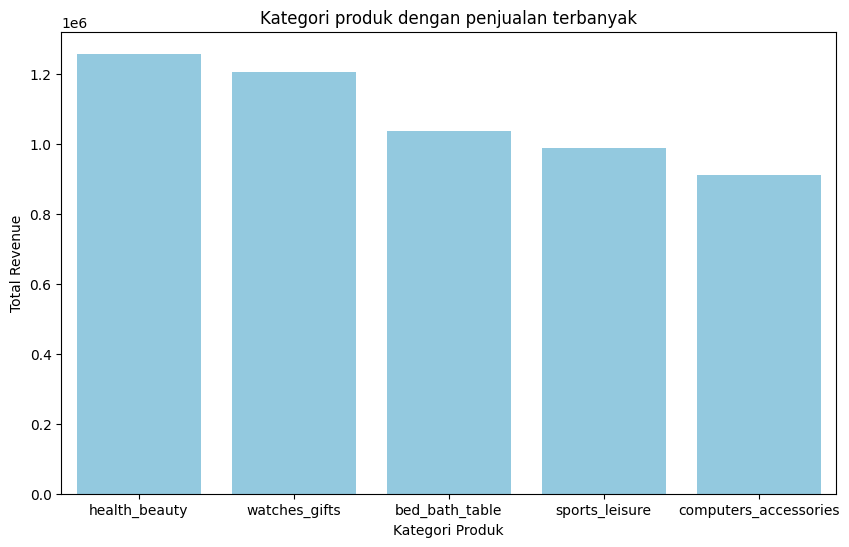

In [172]:
plt.figure(figsize=(10, 6))
sns.barplot(data=category_sum, x='product_category_name_english', y='total_revenue', color='skyblue')
plt.title('Kategori produk dengan penjualan terbanyak')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

**Insight:**
- Berdasarkan pola pembelian pelanggan, kategori produk `health_beauty` adalah yang paling banyak memberikan kontribusi revenue, diikuti oleh kategori `watches_gifts`, `bed_bath_table`,	`sports_leisure`, dan `computers_accessories`.

In [173]:
top_categories = category_sum.sort_values(by='total_revenue', ascending=False).head(3).index
top_categories

Index(['health_beauty', 'watches_gifts', 'bed_bath_table'], dtype='object', name='product_category_name_english')

In [174]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

filtered_df = all_df[all_df['product_category_name_english'].isin(top_categories)]
filtered_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,delivery_time_days
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,...,beleza_saude,59.0,493.0,1.0,2000.0,30.0,12.0,16.0,health_beauty,9
10,00061f2a7bc09da83e415a52dc8a4af1,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2018-03-29 22:28:09,59.99,8.88,c6fc061d86fab1e2b2eac259bac71a49,delivered,2018-03-24 22:16:10,...,beleza_saude,57.0,614.0,1.0,950.0,35.0,25.0,20.0,health_beauty,4
12,0006ec9db01a64e59a68b2c340bf65a7,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-07-26 17:24:20,74.00,23.32,5d178120c29c61748ea95bac23cb8f25,delivered,2018-07-24 17:04:17,...,cama_mesa_banho,54.0,245.0,1.0,1383.0,50.0,10.0,40.0,bed_bath_table,6
20,000e63d38ae8c00bbcb5a30573b99628,1,553e0e7590d3116a072507a3635d2877,1c129092bf23f28a5930387c980c0dfc,2018-03-29 20:07:49,47.90,8.88,98884e672c5ba85f4394f2044e1a3eab,delivered,2018-03-23 19:48:26,...,cama_mesa_banho,38.0,735.0,5.0,800.0,20.0,20.0,20.0,bed_bath_table,3
37,00169e31ef4b29deaae414f9a5e95929,1,b10eba910a974df70b8a12d0665cdb9e,a3e9a2c700480d9bb01fba070ba80a0e,2018-01-23 03:35:47,39.00,16.11,efb3830adb68fb8a89c948774388ec28,delivered,2018-01-16 09:26:39,...,cama_mesa_banho,46.0,246.0,1.0,550.0,51.0,4.0,41.0,bed_bath_table,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111012,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,...,relogios_presentes,41.0,1159.0,4.0,350.0,16.0,14.0,11.0,watches_gifts,21
111013,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,...,relogios_presentes,41.0,1159.0,4.0,350.0,16.0,14.0,11.0,watches_gifts,21
111014,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,...,relogios_presentes,41.0,1159.0,4.0,350.0,16.0,14.0,11.0,watches_gifts,21
111015,fffb9224b6fc7c43ebb0904318b10b5f,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,...,relogios_presentes,41.0,1159.0,4.0,350.0,16.0,14.0,11.0,watches_gifts,21


In [175]:
filtered_df['year_month'] = filtered_df['order_purchase_timestamp'].dt.to_period('M')

monthly_sales = filtered_df.groupby(['product_category_name_english', 'year_month']).agg(
    total_sales=('price', 'sum')
).reset_index()

monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)
monthly_sales = monthly_sales.sort_values(by='year_month')
monthly_sales

<ipython-input-175-0c2dd5c6f1ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year_month'] = filtered_df['order_purchase_timestamp'].dt.to_period('M')


,product_category_name_english,year_month,total_sales
21,health_beauty,2016-09,134.97
0,bed_bath_table,2016-10,478.99
22,health_beauty,2016-10,4552.51
43,watches_gifts,2016-10,3360.24
1,bed_bath_table,2017-01,3960.16
...,...,...,...
41,health_beauty,2018-07,105813.03
62,watches_gifts,2018-07,96212.59
42,health_beauty,2018-08,120803.94
20,bed_bath_table,2018-08,61035.88


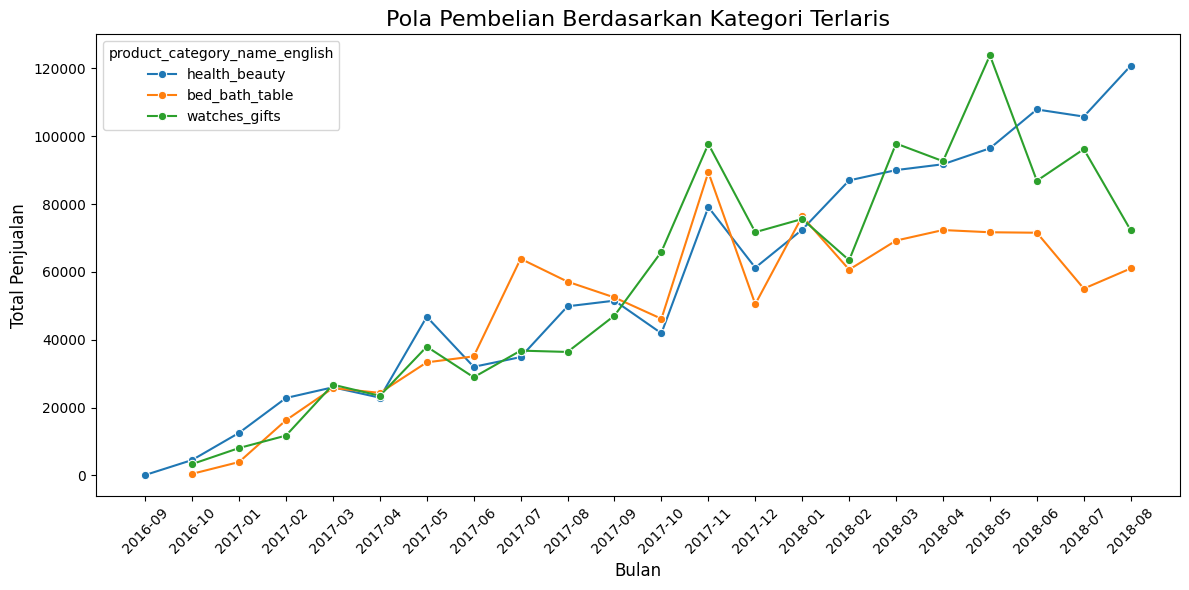

In [176]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='year_month', y='total_sales', hue='product_category_name_english', marker='o')
plt.title('Pola Pembelian Berdasarkan Kategori Terlaris', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Penjualan', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight**
- Dari grafik tersebut, terlihat bahwa kategori `health_beauty` mengalami peningkatan penjualan yang konsisten dan stabil sejak awal 2017, sementara `watches_gifts` menunjukkan fluktuasi yang lebih tajam, dan `bed_bath_table cenderung stabil` dengan sedikit penurunan di pertengahan 2018.

### Pertanyaan 2 : Bagaimana pola pengeluaran pelanggan dapat digunakan untuk menentukan segmen pasar (high spender, medium spender, low spender)?

In [177]:
# Menghitung total pengegluaran per-pesanan
order_total = all_df.groupby('order_id').agg(total_order=('price', 'sum')).reset_index()
order_total.head(5)

,order_id,total_order
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90


In [178]:
# Menggabungkan total pengeluaran per pesanan dengan customer_id
df_customer_spending = pd.merge(order_total, df_orders[['order_id', 'customer_id']], on='order_id')
df_customer_spending.head(5)

,order_id,total_order,customer_id
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,3ce436f183e68e07877b285a838db11a
1,00018f77f2f0320c557190d7a144bdd3,239.90,f6dd3ec061db4e3987629fe6b26e5cce
2,000229ec398224ef6ca0657da4fc703e,199.00,6489ae5e4333f3693df5ad4372dab6d3
3,00024acbcdf0a6daa1e931b038114c75,12.99,d4eb9395c8c0431ee92fce09860c5a06
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,58dbd0b2d70206bf40e62cd34e84d795


In [179]:
# Menghitung total pengeluaran per pelanggan
customer_total_spending = df_customer_spending.groupby('customer_id').agg(total_spent=('total_order', 'sum')).reset_index()
customer_total_spending.head(5)

,customer_id,total_spent
0,00012a2ce6f8dcda20d059ce98491703,89.80
1,000161a058600d5901f007fab4c27140,54.90
2,0001fd6190edaaf884bcaf3d49edf079,179.99
3,0002414f95344307404f0ace7a26f1d5,149.90
4,000379cdec625522490c315e70c7a9fb,93.00


In [180]:
# Menentukan batas untuk kriteria segmentasi
high_spender_threshold = customer_total_spending['total_spent'].quantile(0.75)
low_spender_threshold = customer_total_spending['total_spent'].quantile(0.25)

customer_total_spending['spending_segment'] = np.where(
    customer_total_spending['total_spent'] >= high_spender_threshold, 'High Spender',
    np.where(customer_total_spending['total_spent'] <= low_spender_threshold, 'Low Spender', 'Medium Spender')
)

customer_total_spending.head(5)

,customer_id,total_spent,spending_segment
0,00012a2ce6f8dcda20d059ce98491703,89.80,Medium Spender
1,000161a058600d5901f007fab4c27140,54.90,Medium Spender
2,0001fd6190edaaf884bcaf3d49edf079,179.99,High Spender
3,0002414f95344307404f0ace7a26f1d5,149.90,High Spender
4,000379cdec625522490c315e70c7a9fb,93.00,Medium Spender


In [181]:
# Menghitung jumlah pelanggan di setiap segmen
segment_counts = customer_total_spending['spending_segment'].value_counts()
segment_counts

,count
spending_segment,
Medium Spender,47893
High Spender,24996
Low Spender,24366


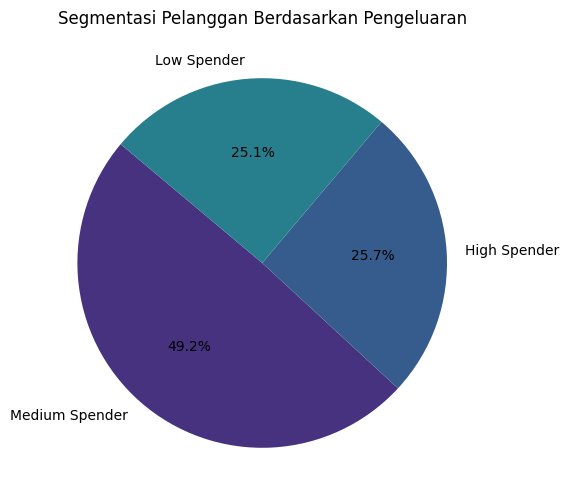

In [182]:
plt.figure(figsize=(8, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title('Segmentasi Pelanggan Berdasarkan Pengeluaran')
plt.show()

**Insight:**
- Berdasarkan segementasi pelanggan berdasarkan pengeluarannya mayoritas pelanggan termasuk dalam kategori "Medium Spender" (49.3%), sementara "Low Spender" dan "High Spender" hampir seimbang dengan proporsi yang mirip, masing-masing sekitar 25%.

In [183]:
avg_segment_spending = customer_total_spending.groupby('spending_segment').agg(avg_spending=('total_spent', 'mean')).sort_values(by='avg_spending', ascending=False).reset_index()
avg_segment_spending

,spending_segment,avg_spending
0,High Spender,338.878566
1,Medium Spender,88.476757
2,Low Spender,28.590412


Text(0.5, 1.0, 'Rata-rata Pengeluaran Pelanggan Berdasarkan Segmentasi')

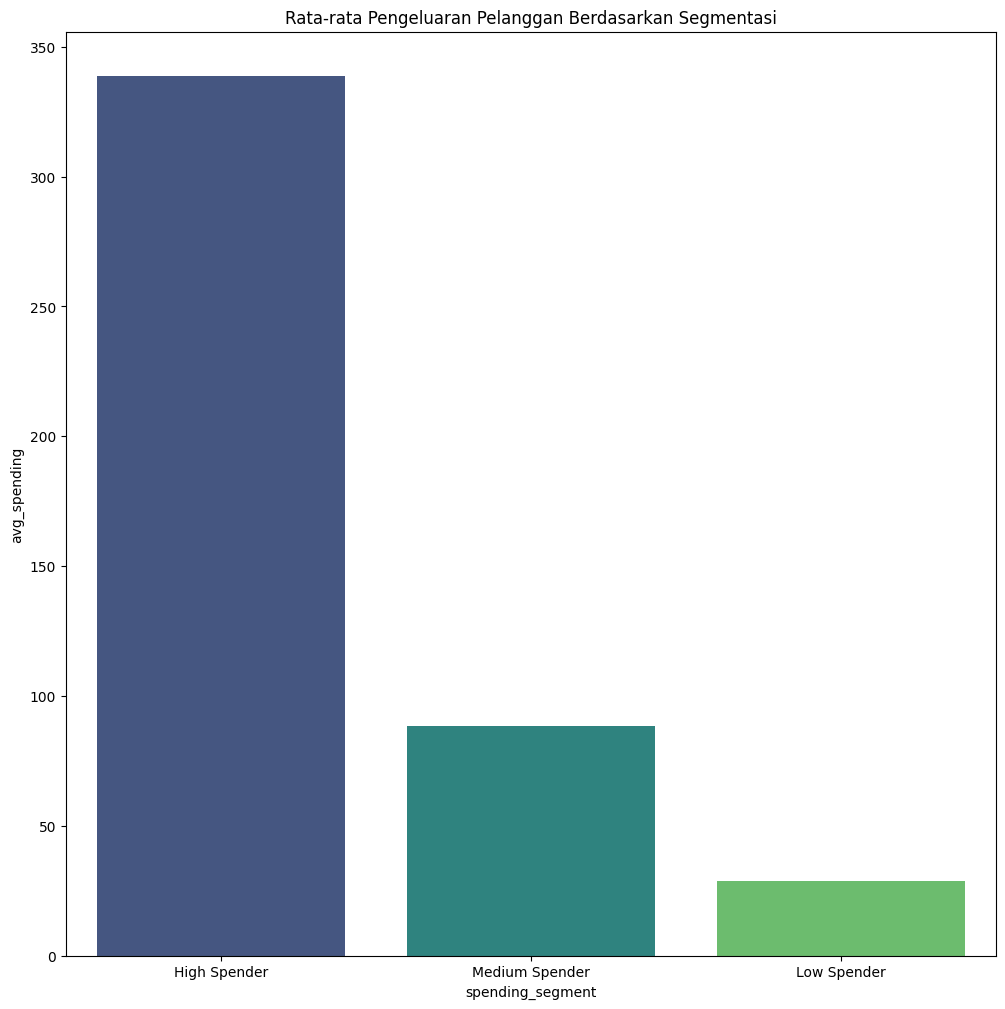

In [184]:
plt.figure(figsize=(12, 12))
sns.barplot(data=avg_segment_spending, x='spending_segment', y='avg_spending',  hue='spending_segment', palette='viridis')
plt.title('Rata-rata Pengeluaran Pelanggan Berdasarkan Segmentasi')

## RFM Analysis

In [185]:
all_df.describe()

,order_item_id,shipping_limit_date,price,freight_value,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,delivery_time,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,delivery_time_days
count,111022.000000,111022,111022.000000,111022.000000,111022,111022,111022,111022,111022,111022.000000,111022.000000,111022.000000,111022.000000,111022.000000,111022.000000,111022.000000,111022.000000,111022.000000,111022.000000
mean,1.198231,2018-01-08 09:31:21.284997632,120.738772,20.025485,2018-01-01 18:02:12.009556736,2018-01-02 04:37:22.622362880,2018-01-05 00:11:13.990443520,2018-01-14 00:01:09.751049472,2018-01-25 14:13:07.692529152,2017.543532,11.787357,48.774432,787.870854,2.209562,2099.897507,30.212210,16.624966,23.042172,11.787357
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-04 14:08:38,2016-10-04 14:08:38,2016-10-04 00:00:00,2016.000000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,0.000000
25%,1.000000,2017-09-21 04:30:36.750000128,39.900000,13.080000,2017-09-14 12:01:38.750000128,2017-09-14 19:25:18.249999872,2017-09-18 18:42:22,2017-09-25 22:39:35,2017-10-05 00:00:00,2017.000000,6.000000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6.000000
50%,1.000000,2018-01-28 22:55:38,74.990000,16.310000,2018-01-21 11:39:48,2018-01-22 13:58:40,2018-01-24 19:12:58.500000,2018-02-02 19:55:45.500000,2018-02-16 00:00:00,2018.000000,10.000000,52.000000,602.500000,1.000000,700.000000,25.000000,13.000000,20.000000,10.000000
75%,1.000000,2018-05-10 22:55:17.750000128,134.900000,21.180000,2018-05-05 18:13:48.500000,2018-05-06 10:30:29.750000128,2018-05-08 14:33:00,2018-05-15 20:07:46.249999872,2018-05-28 00:00:00,2018.000000,15.000000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,15.000000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,2018.000000,209.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,209.000000
std,0.706934,NaN,183.292804,15.841529,NaN,NaN,NaN,NaN,NaN,0.504714,9.472263,10.025942,652.172826,1.721434,3754.972723,16.190473,13.468184,11.717712,9.472263


In [186]:
rfm_df = all_df.groupby('seller_id', as_index=False).agg({
    'order_purchase_timestamp': 'max', # Mengambil tanggal terakhir penjualan
    'order_id': 'nunique', # Menghitung jumlah pesanan yang unik
    'price': 'sum' # Menghitung total pembelian
})
rfm_df.columns = ['seller_id', 'last_order_date', 'frequency', 'monetary']
rfm_df['seller_id'] = rfm_df['seller_id'].str[:5]
rfm_df.head(5)

,seller_id,last_order_date,frequency,monetary
0,0015a,2017-10-18 08:16:34,3,2685.00
1,001cc,2018-07-12 21:38:26,200,25080.03
2,001e6,2018-08-07 22:50:37,1,250.00
3,00210,2018-04-12 12:58:23,51,1234.50
4,004c9,2018-05-01 18:06:57,147,17841.69


In [187]:
# Menghitung kapan terakhir seller melakukan transaksi (hari)
rfm_df['last_order_date'] = rfm_df['last_order_date'].dt.date
recent_date = all_df['order_purchase_timestamp'].dt.date.max()
rfm_df['recency'] = rfm_df['last_order_date'].apply(lambda x: (recent_date - x).days)

rfm_df.head(5)

,seller_id,last_order_date,frequency,monetary,recency
0,0015a,2017-10-18,3,2685.00,320
1,001cc,2018-07-12,200,25080.03,53
2,001e6,2018-08-07,1,250.00,27
3,00210,2018-04-12,51,1234.50,144
4,004c9,2018-05-01,147,17841.69,125


In [188]:
rfm_df.drop('last_order_date', axis=1, inplace=True)
rfm_df.head(5)

,seller_id,frequency,monetary,recency
0,0015a,3,2685.00,320
1,001cc,200,25080.03,53
2,001e6,1,250.00,27
3,00210,51,1234.50,144
4,004c9,147,17841.69,125


In [189]:
rfm_df.describe(include='all')

,seller_id,frequency,monetary,recency
count,3033,3033.000000,3033.000000,3033.000000
unique,3029,NaN,NaN,NaN
top,a1bea,NaN,NaN,NaN
freq,2,NaN,NaN,NaN
mean,NaN,32.498846,4419.604332,139.416419
std,NaN,105.790142,13989.229918,168.483423
min,NaN,1.000000,3.500000,0.000000
25%,NaN,2.000000,209.500000,18.000000
50%,NaN,6.000000,834.000000,49.000000
75%,NaN,22.000000,3365.600000,213.000000


In [190]:
rfm_df.sort_values(by='recency', ascending=True).head(5)

,seller_id,frequency,monetary,recency
432,25be9,5,769.00,0
1900,9f505,397,26361.82,5
148,0be8f,161,11805.50,5
1080,5a413,14,778.90,5
2963,fa1c1,585,194042.03,5


In [191]:
rfm_df.sort_values(by='frequency', ascending=False).head(5)

,seller_id,frequency,monetary,recency
1212,65602,1854,123304.83,5
865,4a3ca,1806,200472.92,7
2429,cc419,1706,104288.42,7
360,1f50f,1404,106939.21,9
2589,da862,1314,160236.57,6


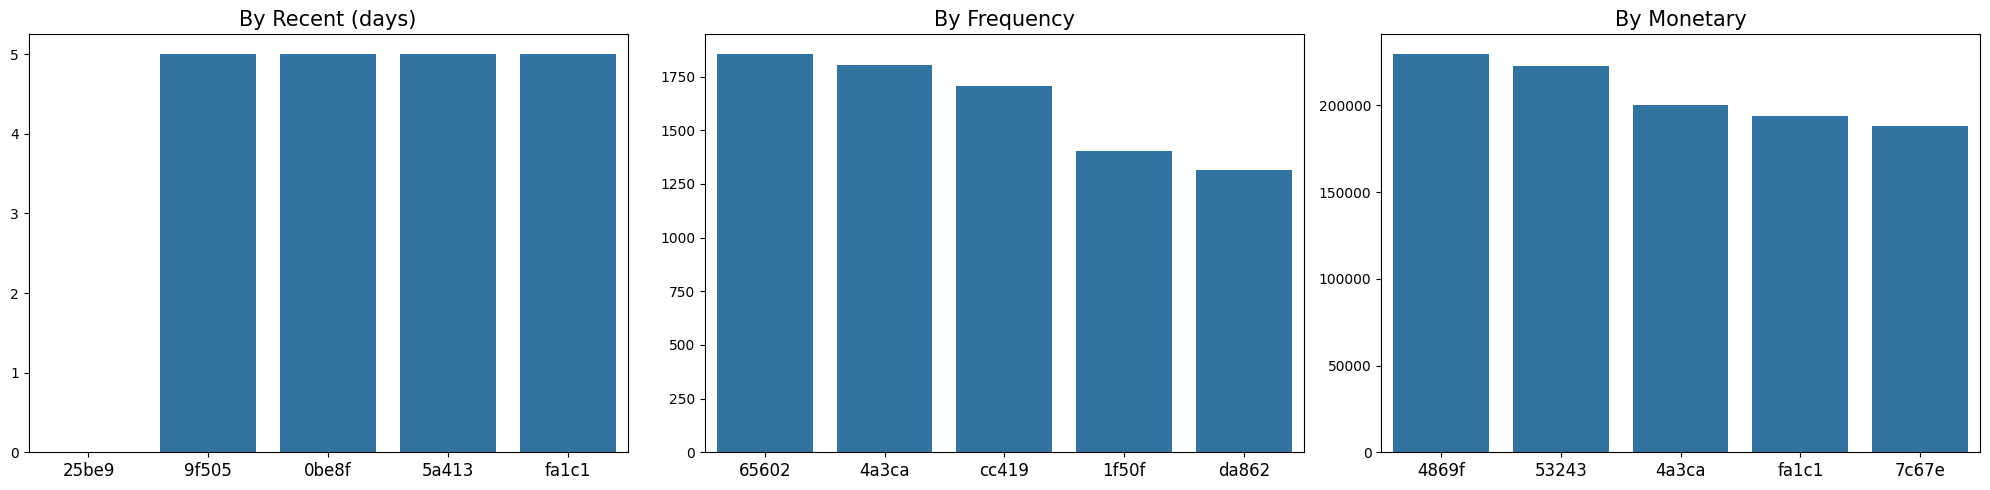

In [192]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.barplot(y='recency', x='seller_id', data=rfm_df.sort_values(by='recency', ascending=True).head(5), ax=ax[0])
ax[0].set_title('By Recent (days)', loc='center', fontsize=15)
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].tick_params(axis='x', labelsize=12)

sns.barplot(y='frequency', x='seller_id', data=rfm_df.sort_values(by='frequency', ascending=False).head(5), ax=ax[1])
ax[1].set_title('By Frequency', loc='center', fontsize=15)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].tick_params(axis='x', labelsize=12)

sns.barplot(y='monetary', x='seller_id', data=rfm_df.sort_values(by='monetary', ascending=False).head(5), ax=ax[2])
ax[2].set_title('By Monetary', loc='center', fontsize=15)
ax[2].set_xlabel(None)
ax[2].set_ylabel(None)
ax[2].tick_params(axis='x', labelsize=12)

plt.tight_layout()
plt.show()

#### Mengurutkan seller berdasarkan recency, frequency, & monetary score

In [193]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head(5)

,seller_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,0015a,3,2685.00,320,495.0,1017.0,2166.0
1,001cc,200,25080.03,53,1483.5,2946.5,2934.0
2,001e6,1,250.00,27,1945.5,286.5,835.0
3,00210,51,1234.50,144,983.0,2621.0,1752.0
4,004c9,147,17841.69,125,1065.5,2900.5,2896.0


In [194]:
# Normalisasi rank seller
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(['r_rank', 'f_rank', 'm_rank'], axis=1, inplace=True)

rfm_df.head(5)

,seller_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,0015a,3,2685.00,320,16.320475,33.531157,71.414441
1,001cc,200,25080.03,53,48.911968,97.148038,96.735905
2,001e6,1,250.00,27,64.144411,9.446093,27.530498
3,00210,51,1234.50,144,32.410155,86.416090,57.764590
4,004c9,147,17841.69,125,35.130234,95.631388,95.483020


In [195]:
rfm_df['RFM_score'] = 0.15 * rfm_df['r_rank_norm'] + 0.28 * rfm_df['f_rank_norm'] + 0.57 * rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['seller_id', 'RFM_score']].head(10)

,seller_id,RFM_score
0,0015a,2.63
1,001cc,4.48
2,001e6,1.40
3,00210,3.10
4,004c9,4.32
5,00720,2.91
6,00ab3,0.54
7,00d8b,0.68
8,00ee6,4.56
9,00fc7,4.26


#### Segmentasi seller berdasarkan RFM_score

In [196]:
rfm_df['seller_segment'] = np.where(
    rfm_df['RFM_score'] > 4.5, "Super Star Seller", (np.where(
        rfm_df['RFM_score'] > 4, "Star Seller",(np.where(
            rfm_df['RFM_score'] > 3, "Experienced Sellers", np.where(
                rfm_df['RFM_score'] > 1.6, 'Regular Sellerm', 'Down Seller'))))))

rfm_df[['seller_id', 'RFM_score', 'seller_segment']].head(10)

,seller_id,RFM_score,seller_segment
0,0015a,2.63,Regular Sellerm
1,001cc,4.48,Star Seller
2,001e6,1.40,Down Seller
3,00210,3.10,Experienced Sellers
4,004c9,4.32,Star Seller
5,00720,2.91,Regular Sellerm
6,00ab3,0.54,Down Seller
7,00d8b,0.68,Down Seller
8,00ee6,4.56,Super Star Seller
9,00fc7,4.26,Star Seller


In [197]:
df_seller_segment = rfm_df.groupby('seller_segment', as_index=False).seller_id.nunique()
df_seller_segment

,seller_segment,seller_id
0,Down Seller,904
1,Experienced Sellers,649
2,Regular Sellerm,985
3,Star Seller,305
4,Super Star Seller,189


In [198]:
df_seller_segment['seller_segment'] = pd.Categorical(df_seller_segment['seller_segment'], [
    'Super Star Seller', 'Star Seller', 'Experienced Sellers', 'Regular Sellerm', 'Down Seller'
    ])

<ipython-input-199-fda1dc81c56f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


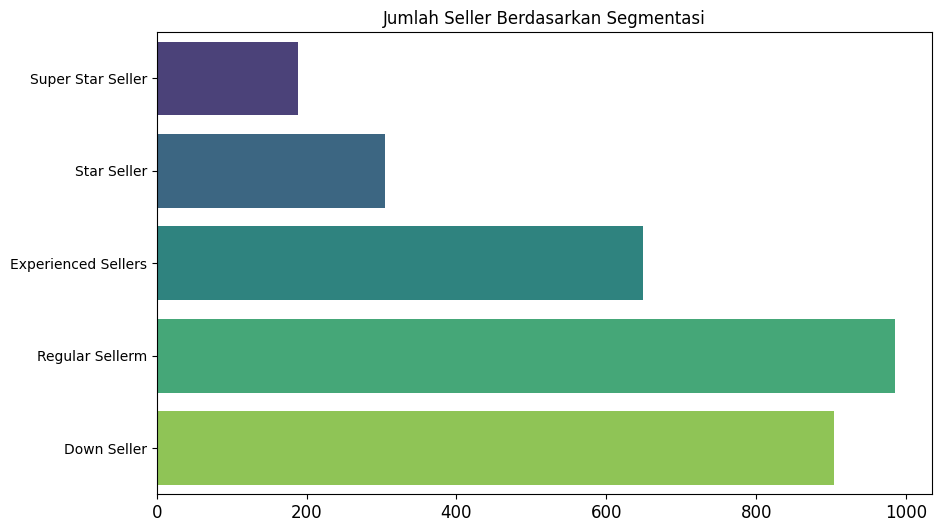

In [199]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_seller_segment.sort_values(by='seller_segment', ascending=False),
    x='seller_id',
    y='seller_segment',
    palette='viridis'
    )
plt.title('Jumlah Seller Berdasarkan Segmentasi')
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight**
- Dari diagram jumlah aeller berdasarkan segmentasi jumlah seller terbanyak ada pada segment `Reguler seller` untuk yang paling sedikit seller dengan segmenntasi `Super Star Seller`.

## Conclusion

**Conclusion Pertanyaan 1-Bagaimana pola pembelian pelanggan berdasarkan kategori produk?:**
- Pola pembelian pelanggan menunjukkan bahwa kategori `health_beauty` menjadi kontributor utama revenue dengan peningkatan penjualan yang konsisten sejak 2017, menandakan kebutuhan rutin di kategori ini. `Watches_gifts` berada di posisi kedua dengan pola penjualan yang fluktuatif, mungkin dipengaruhi oleh musim atau momen tertentu, sementara `bed_bath_table` stabil namun sedikit menurun di pertengahan 2018. Kategori `sports_leisure` dan `computers_accessories` juga termasuk dalam lima besar dari 71 kategori, meskipun kontribusinya lebih rendah, menunjukkan bahwa pelanggan lebih sering membeli produk perawatan diri dibandingkan produk lain.

**Conclusion Pertanyaan 2-Bagaimana pola pengeluaran pelanggan dapat digunakan untuk menentukan segmen pasar (high spender, medium spender, low spender)?:**
- Berdasarkan analisis pola pengeluaran pelanggan, dapat disimpulkan bahwa pelanggan dapat dibagi menjadi tiga segmen pasar: `High Spender`, `Medium Spender`, dan `Low Spender`. Segmen `High Spender` memiliki rata-rata pengeluaran sebesar 338,87 dan terdiri dari 25.307 pelanggan, meskipun jumlahnya lebih sedikit, mereka memberikan kontribusi besar terhadap pendapatan. Segmen `Medium Spender` adalah yang terbesar, dengan 48.603 pelanggan dan rata-rata pengeluaran 88,63, menunjukkan bahwa mayoritas pelanggan cenderung menghabiskan dalam kisaran pengeluaran menengah. Sementara itu, segmen `Low Spender` memiliki rata-rata pengeluaran paling rendah, yaitu 28,60, dengan jumlah pelanggan 24.756. Untuk strategi pemasaran, segmen `High Spender` dapat diberi penawaran eksklusif dan produk premium, `Medium Spender` dapat ditargetkan dengan promosi dan variasi produk yang lebih beragam, dan `Low Spender` mungkin lebih sensitif terhadap harga dan lebih cocok dengan tawaran produk terjangkau atau diskon. Dengan memahami pola pengeluaran ini, perusahaan dapat merancang kampanye pemasaran yang lebih terfokus dan meningkatkan efisiensi serta kepuasan pelanggan.

**Hasil RFM Analisis:**
- Berdasarkan analisis RFM, teridentifikasi bahwa segmentasi jumlah seller terbanyak berada pada kategori `Reguler Seller`, sedangkan segmen dengan jumlah seller paling sedikit adalah `Super Star Seller`. Hal ini menunjukkan bahwa meskipun ada banyak seller dalam kategori reguler, perusahaan perlu mencari cara untuk mengembangkan dan memberdayakan seller yang berada dalam kategori `Super Star` agar dapat memberikan kontribusi yang lebih signifikan terhadap pendapatan dan pertumbuhan perusahaan.